In [273]:
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('diamonds.csv')

In [274]:
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [275]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [276]:
print("Info")
print(df.info())

print("Describe()")
print(df.describe())

print("Null Check")
print(df.isnull().sum())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  T

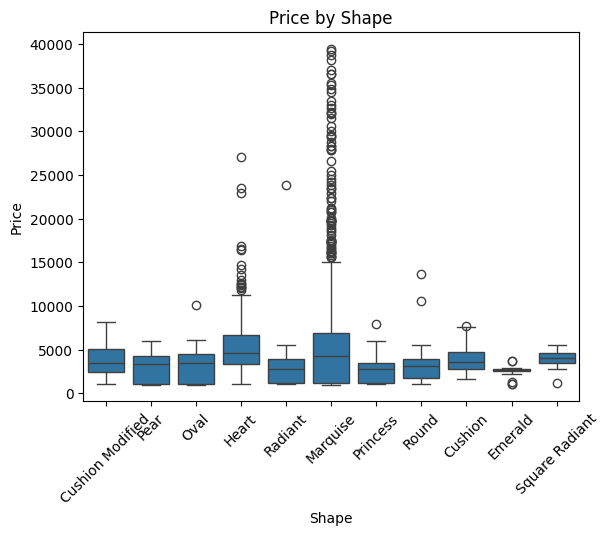

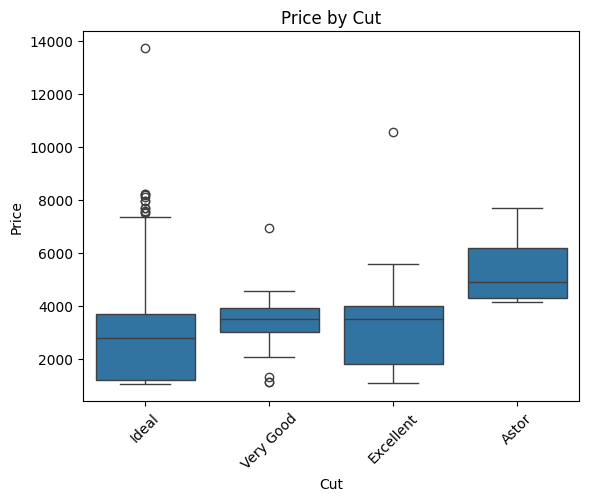

In [277]:
# Box plot: Shape vs Price
sns.boxplot(data=df, x='Shape', y='Price')
plt.title('Price by Shape')
plt.xlabel('Shape')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box plot: Cut vs Price
sns.boxplot(data=df, x='Cut', y='Price')
plt.title('Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [278]:
# # Filter data for "Marquise" diamonds
# marquise_data = df[df['Shape'] == 'Marquise']

# # Summary statistics for "Marquise"
# print(marquise_data['Price'].describe())

# # Identify outliers for "Marquise" using IQR
# Q1 = marquise_data['Price'].quantile(0.25)
# Q3 = marquise_data['Price'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# marquise_outliers = marquise_data[(marquise_data['Price'] < lower_bound) | (marquise_data['Price'] > upper_bound)]
# marquise_cleaned = marquise_data[(marquise_data['Price'] >= lower_bound) & (marquise_data['Price'] <= upper_bound)]

# # Print results
# print(f"Total Marquise diamonds: {marquise_data.shape[0]}")
# print(f"Outliers: {marquise_outliers.shape[0]}")
# print(f"After removing outliers: {marquise_cleaned.shape[0]}")

# # Plot the distribution of prices for "Marquise"
# plt.figure(figsize=(8, 5))
# sns.histplot(marquise_data['Price'], bins=30, kde=True, color='blue')
# plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.0f})')
# plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.0f})')
# plt.title('Price Distribution for Marquise Diamonds')
# plt.xlabel('Price')
# plt.ylabel('Count')
# plt.legend()
# plt.show()


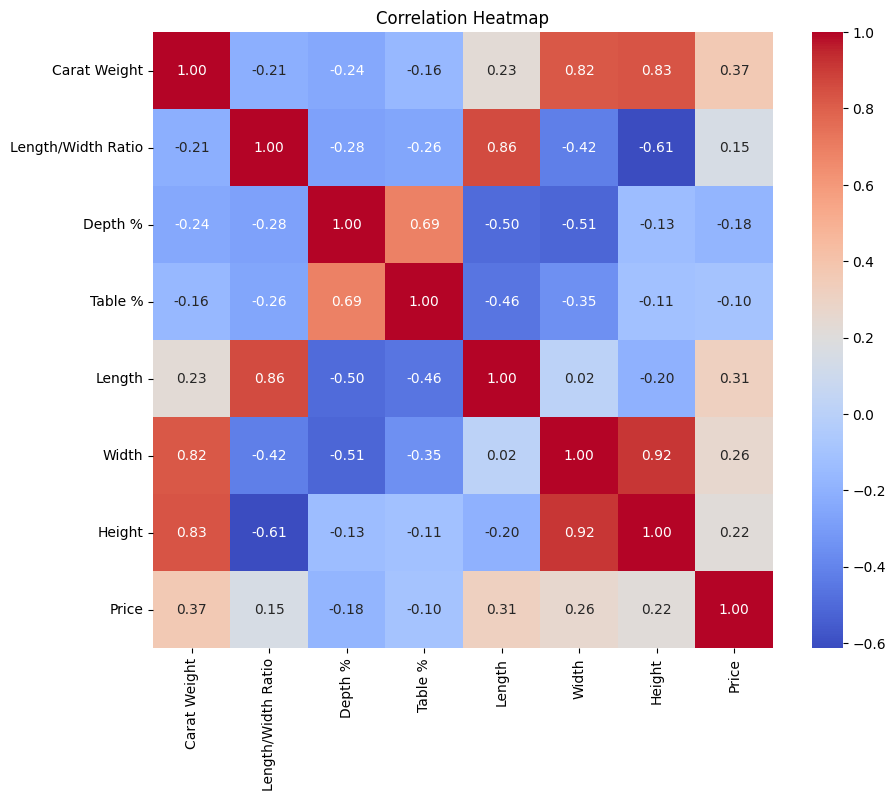

In [279]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


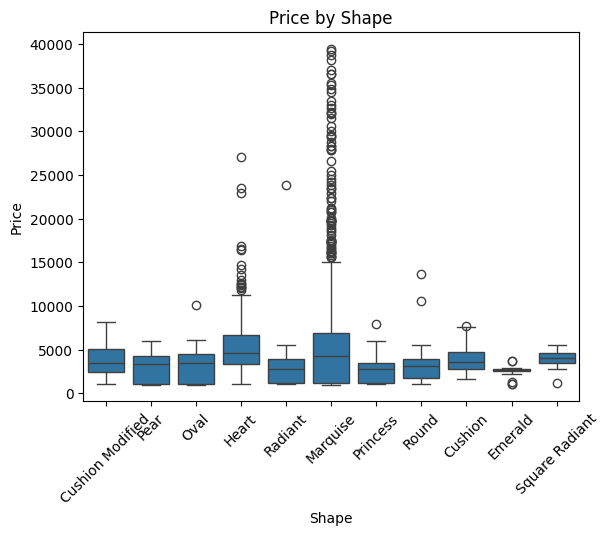

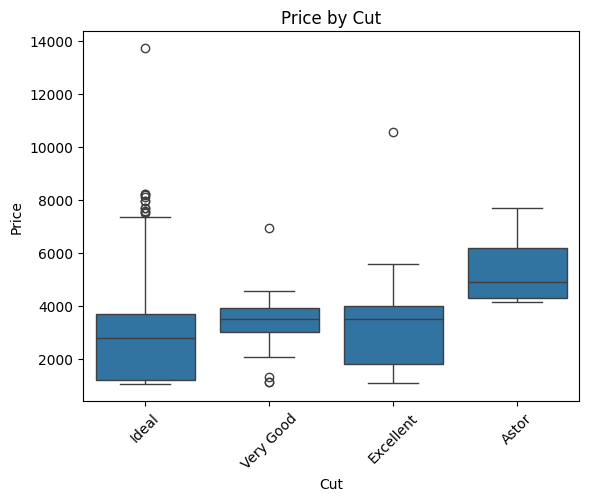

In [280]:
# Box plot: Shape vs Price
sns.boxplot(data=df, x='Shape', y='Price')
plt.title('Price by Shape')
plt.xlabel('Shape')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box plot: Cut vs Price
sns.boxplot(data=df, x='Cut', y='Price')
plt.title('Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [281]:
non_missing_cuts = df['Cut'].dropna().values

# Function to randomly select a value from non-missing 'Cut' values
def random_fillna(series, fill_values):
    return series.apply(lambda x: np.random.choice(fill_values) if pd.isna(x) else x)

# Apply the function to the 'Cut' column
df['Cut'] = random_fillna(df['Cut'], non_missing_cuts)

df['Fluorescence']=df['Fluorescence'].fillna('None')
df['Culet']=df['Culet'].fillna('Pointed')
df = df.drop_duplicates()

# Q1 = df['Price'].quantile(0.25)  # First quartile (25th percentile)
# Q3 = df['Price'].quantile(0.75)  # Third quartile (75th percentile)
# IQR = Q3 - Q1                    # Interquartile Range
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
# print(f"Original DataFrame shape: {df.shape}")
# print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

In [282]:
def remove_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]

df_filtered = df[df['Cut'].isin(['Ideal', 'Excellent', 'Very Good'])]
df_no_outliers = df_filtered.groupby('Cut', group_keys=False).apply(remove_outliers)
df_remaining = df[~df['Cut'].isin(['Ideal', 'Excellent', 'Very Good'])]
df = pd.concat([df_no_outliers, df_remaining])


C:\Users\mdtah\AppData\Local\Temp\ipykernel_4956\2697442527.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_filtered.groupby('Cut', group_keys=False).apply(remove_outliers)


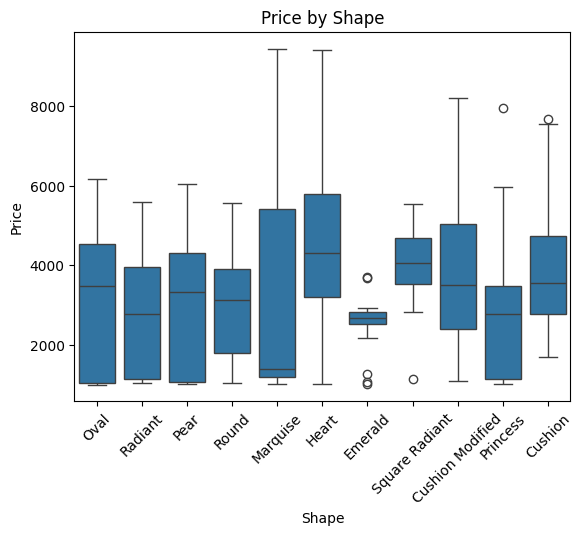

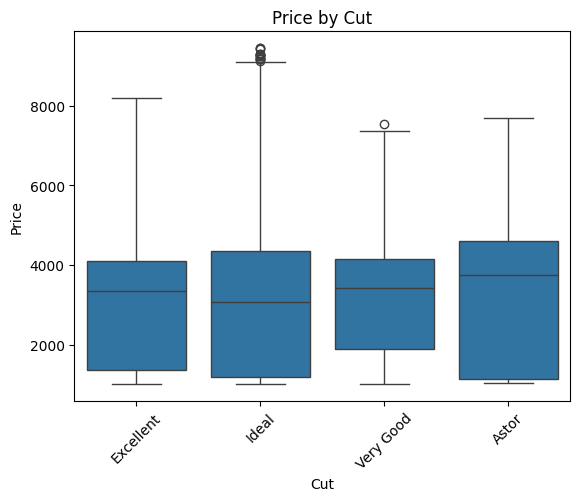

In [283]:
# Box plot: Shape vs Price
sns.boxplot(data=df, x='Shape', y='Price')
plt.title('Price by Shape')
plt.xlabel('Shape')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box plot: Cut vs Price
sns.boxplot(data=df, x='Cut', y='Price')
plt.title('Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

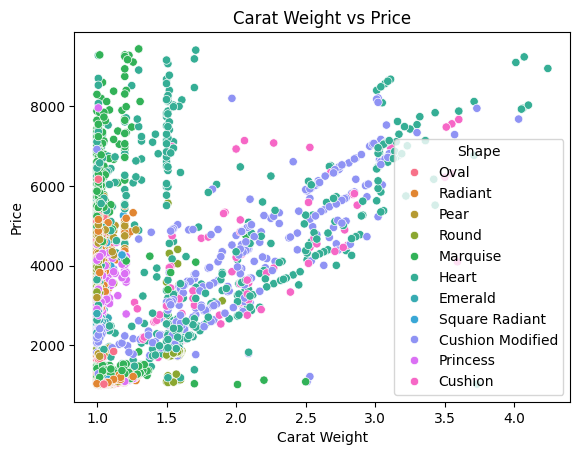

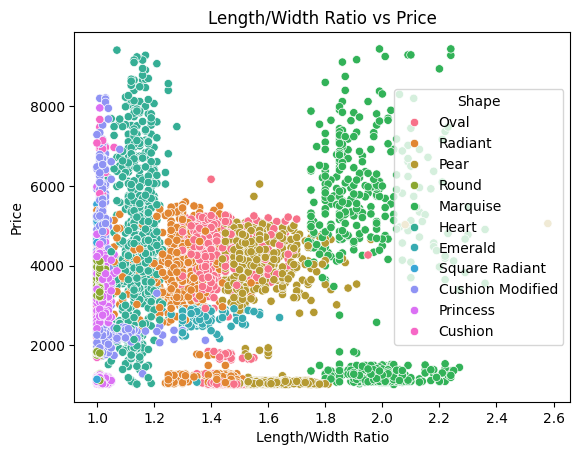

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Carat Weight vs Price
sns.scatterplot(data=df, x='Carat Weight', y='Price', hue='Shape')
plt.title('Carat Weight vs Price')
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.show()

# Scatter plot: Length/Width Ratio vs Price
sns.scatterplot(data=df, x='Length/Width Ratio', y='Price', hue='Shape')
plt.title('Length/Width Ratio vs Price')
plt.xlabel('Length/Width Ratio')
plt.ylabel('Price')
plt.show()


In [285]:
print("Info")
print(df.info())

print("Describe()")
print(df.describe())

print("Null Check")
print(df.isnull().sum())

Info
<class 'pandas.core.frame.DataFrame'>
Index: 6245 entries, 5 to 6420
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6240 non-null   object 
 1   Cut                 6245 non-null   object 
 2   Color               6240 non-null   object 
 3   Clarity             6240 non-null   object 
 4   Carat Weight        6240 non-null   float64
 5   Length/Width Ratio  6240 non-null   float64
 6   Depth %             6238 non-null   float64
 7   Table %             6229 non-null   float64
 8   Polish              6226 non-null   object 
 9   Symmetry            6226 non-null   object 
 10  Girdle              6224 non-null   object 
 11  Culet               6245 non-null   object 
 12  Length              6226 non-null   float64
 13  Width               6226 non-null   float64
 14  Height              6226 non-null   float64
 15  Price               6245 non-null   int64  
 16  Type  

In [286]:
df = df.dropna()
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Shape, Cut, Color, Clarity, Carat Weight, Length/Width Ratio, Depth %, Table %, Polish, Symmetry, Girdle, Culet, Length, Width, Height, Price, Type, Fluorescence]
Index: []


In [287]:
print("Info")
print(df.info())

print("Describe()")
print(df.describe())

print("Null Check")
print(df.isnull().sum())

Info
<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 5 to 6420
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6224 non-null   object 
 1   Cut                 6224 non-null   object 
 2   Color               6224 non-null   object 
 3   Clarity             6224 non-null   object 
 4   Carat Weight        6224 non-null   float64
 5   Length/Width Ratio  6224 non-null   float64
 6   Depth %             6224 non-null   float64
 7   Table %             6224 non-null   float64
 8   Polish              6224 non-null   object 
 9   Symmetry            6224 non-null   object 
 10  Girdle              6224 non-null   object 
 11  Culet               6224 non-null   object 
 12  Length              6224 non-null   float64
 13  Width               6224 non-null   float64
 14  Height              6224 non-null   float64
 15  Price               6224 non-null   int64  
 16  Type  

In [288]:
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
5,Oval,Excellent,E,VVS2,1.00,1.45,59.8,57.0,Excellent,Very Good,Slightly Thick to Thick,Pointed,8.19,5.63,3.36,4660,GIA,Faint
12,Radiant,Excellent,H,VS1,1.06,1.12,69.5,66.0,Excellent,Very Good,Medium to Slightly Thick,Pointed,6.08,5.41,3.76,3650,GIA,None
17,Pear,Excellent,F,VS2,1.01,1.56,59.4,56.0,Excellent,Excellent,Slightly Thick to Very Thick,Pointed,8.69,5.58,3.31,4320,GIA,None
18,Radiant,Excellent,G,VS2,1.01,1.29,67.9,68.0,Excellent,Very Good,Thick to Very Thick,Pointed,6.55,5.09,3.45,3000,GIA,None
30,Pear,Excellent,H,VS2,1.00,1.66,62.4,60.0,Excellent,Excellent,Medium to Thick,Pointed,9.04,5.46,3.41,3840,GIA,Faint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,Radiant,Astor,E,VS1,1.08,1.45,67.0,66.0,Excellent,Excellent,Slightly Thick to Thick,Pointed,7.33,5.05,3.39,1070,GIA Lab-Grown,None
6020,Princess,Astor,H,VS2,1.00,1.05,77.0,70.0,Excellent,Very Good,Thick to Very Thick,Pointed,5.52,5.27,4.05,4140,GIA,None
6095,Oval,Astor,E,VS1,1.05,1.48,63.2,60.0,Excellent,Excellent,Medium to Slightly Thick,Pointed,8.31,5.62,3.55,1030,IGI Lab-Grown,None
6217,Princess,Astor,H,VS2,1.02,1.00,75.8,63.0,Excellent,Very Good,Thick,Pointed,5.45,5.43,4.12,4230,GIA,None


In [289]:
print(df.columns)

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')


In [290]:
df = pd.get_dummies(df,columns=["Shape","Cut","Color","Clarity","Polish","Symmetry","Girdle","Culet","Type","Fluorescence"])

In [291]:
X=df.drop('Price',axis=1).to_numpy()
y=df['Price'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=37)  

In [292]:
model = ensemble.GradientBoostingRegressor()

# Parameters we want to try
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [6, 9, 17],
    'learning_rate': [0.2, 0.1],
    'max_features': [1.0, 'sqrt'],
    'loss': ['squared_error', 'absolute_error', 'huber'],
}
 
gs_cv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=100)


In [293]:
# gs_cv.fit(X_train, y_train)

# # Print the parameters that gave us the best result!
# print(gs_cv.best_params_)                                                                                                 

In [294]:
hypermodel = ensemble.GradientBoostingRegressor(
    learning_rate = 0.1,
    loss  = 'absolute_error',
    max_depth = 10,
    max_features = 1.0,
    min_samples_leaf = 9, 
    n_estimators = 1000,
) 

hypermodel.fit(X_train,y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=10, max_features=1.0,
                          min_samples_leaf=9, n_estimators=1000)

In [295]:
y_pred=hypermodel.predict(X_test)
x_pred=hypermodel.predict(X_train)

In [296]:
from sklearn.metrics import mean_squared_error

testmse = mean_squared_error(y_test,y_pred)
testmse

np.float64(355704.88059796934)

In [297]:
trainmae = mean_absolute_error(y_train, x_pred)
trainmae

np.float64(115.49962400313028)

In [298]:
testmae = mean_absolute_error(y_test, y_pred)
testmae

np.float64(279.99892005690236)

In [299]:
trainr2 = r2_score(y_train,x_pred)
trainr2

0.9520480163056119

In [300]:
testr2 = r2_score(y_test, y_pred)
testr2

0.8841940329604034

In [306]:
print("Model Metrics (to 3 d.p.)")
print("MSE : 418873.158")
print("MAE: 354.434")
print("R2: 0.875")
print("")
print("Hypermodel Metrics (to 3 d.p.)")
print("MSE : 355704.880")
print("MAE: 229.999")
print("R2: 0.884")

Model Metrics (to 3 d.p.)
MSE : 418873.158
MAE: 354.434
R2: 0.875

Hypermodel Metrics (to 3 d.p.)
MSE : 355704.880
MAE: 229.999
R2: 0.884


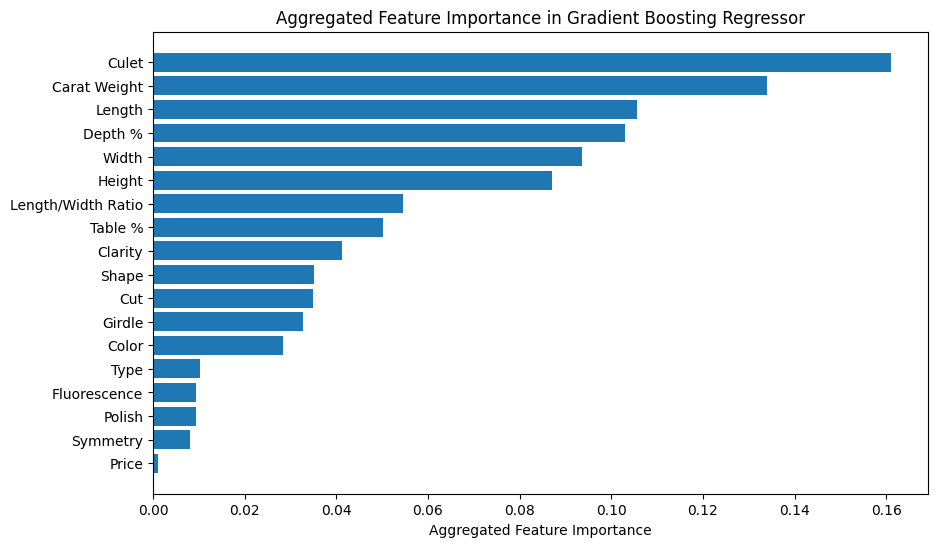

In [301]:
# Example mapping of original categorical features to their one-hot encoded columns
one_hot_mapping = {
    'Shape': ['Shape_Cushion', 'Shape_Cushion Modified', 'Shape_Emerald', 'Shape_Heart',
              'Shape_Marquise', 'Shape_Oval', 'Shape_Pear', 'Shape_Princess',
              'Shape_Radiant', 'Shape_Round', 'Shape_Square Radiant'],
    'Cut': ['Cut_Astor', 'Cut_Excellent', 'Cut_Ideal', 'Cut_Very Good'],
    'Color': ['Color_D', 'Color_E', 'Color_F', 'Color_G', 'Color_H'],
    'Clarity': ['Clarity_FL', 'Clarity_IF', 'Clarity_VS1', 'Clarity_VS2',
                'Clarity_VVS1', 'Clarity_VVS2'],
    'Polish': ['Polish_Excellent', 'Polish_Good', 'Polish_Very Good'],
    'Symmetry': ['Symmetry_Excellent', 'Symmetry_Good', 'Symmetry_Very Good'],
    'Girdle': ['Girdle_Extremely Thick', 'Girdle_Extremely Thin to Extremely Thick',
               'Girdle_Extremely Thin to Medium', 'Girdle_Extremely Thin to Slightly Thick',
               'Girdle_Medium', 'Girdle_Medium to Extremely Thick', 'Girdle_Medium to Slightly Thick',
               'Girdle_Medium to Thick', 'Girdle_Medium to Very Thick', 'Girdle_Slightly Thick',
               'Girdle_Slightly Thick to Extremely Thick', 'Girdle_Slightly Thick to Slightly Thick',
               'Girdle_Slightly Thick to Thick', 'Girdle_Slightly Thick to Very Thick', 'Girdle_Thick',
               'Girdle_Thick to Extremely Thick', 'Girdle_Thick to Very Thick', 'Girdle_Thin',
               'Girdle_Thin to Extremely Thick', 'Girdle_Thin to Medium', 'Girdle_Thin to Slightly Thick',
               'Girdle_Thin to Thick', 'Girdle_Thin to Very Thick', 'Girdle_Very Thick',
               'Girdle_Very Thick to Extremely Thick', 'Girdle_Very Thin to Extremely Thick',
               'Girdle_Very Thin to Slightly Thick', 'Girdle_Very Thin to Thick', 'Girdle_Very Thin to Very Thick'],
    'Culet': ['Culet_Medium', 'Culet_Pointed', 'Culet_Small', 'Culet_Very Small'],
    'Type': ['Type_GIA', 'Type_GIA Lab-Grown', 'Type_IGI Lab-Grown'],
    'Fluorescence': ['Fluorescence_Faint', 'Fluorescence_Medium', 'Fluorescence_None', 'Fluorescence_Strong']
}

importances = hypermodel.feature_importances_
feature_names = df.columns.tolist()
# Assuming 'importances' is a numpy array of feature importances
# and 'feature_names' is a list of the corresponding feature names
feature_importance_dict = dict(zip(feature_names, importances))

aggregated_importances = {}

for original_feature, encoded_features in one_hot_mapping.items():
    # Sum the importances of the one-hot encoded columns
    aggregated_importances[original_feature] = sum(
        feature_importance_dict.get(feat, 0) for feat in encoded_features
    )

# Add the importances of the non-categorical features
non_categorical_features = ['Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %',
                            'Length', 'Width', 'Height', 'Price']
for feature in non_categorical_features:
    aggregated_importances[feature] = feature_importance_dict.get(feature, 0)

# Sort the aggregated importances in descending order
sorted_importances = sorted(aggregated_importances.items(), key=lambda x: x[1], reverse=True)
sorted_features = [item[0] for item in sorted_importances]
sorted_values = [item[1] for item in sorted_importances]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_values)), sorted_values, align='center')
plt.yticks(range(len(sorted_values)), sorted_features)
plt.xlabel('Aggregated Feature Importance')
plt.title('Aggregated Feature Importance in Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()


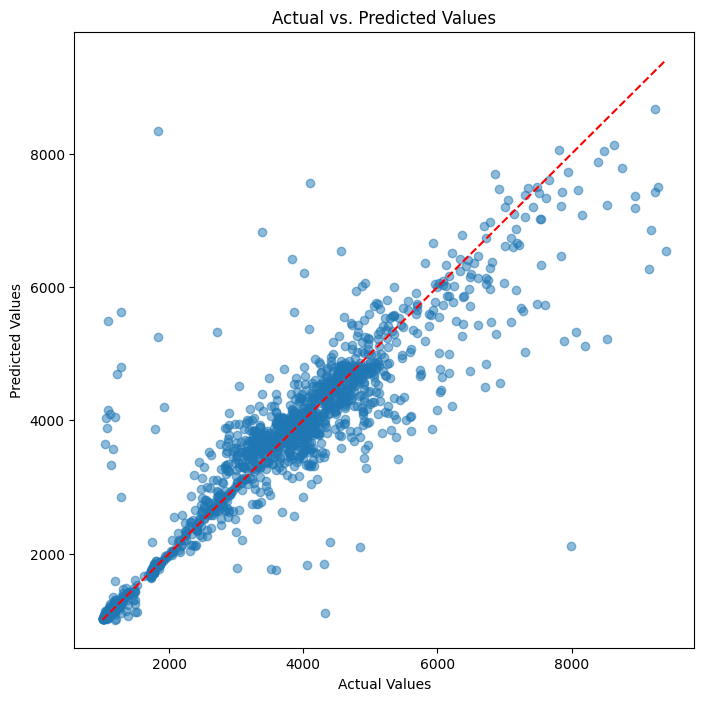

In [302]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [303]:
# import joblib
# joblib.dump(hypermodel, "model.pkl")

In [304]:
print(df.columns)

Index(['Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %', 'Length',
       'Width', 'Height', 'Price', 'Shape_Cushion', 'Shape_Cushion Modified',
       'Shape_Emerald', 'Shape_Heart', 'Shape_Marquise', 'Shape_Oval',
       'Shape_Pear', 'Shape_Princess', 'Shape_Radiant', 'Shape_Round',
       'Shape_Square Radiant', 'Cut_Astor', 'Cut_Excellent', 'Cut_Ideal',
       'Cut_Very Good', 'Color_D', 'Color_E', 'Color_F', 'Color_G', 'Color_H',
       'Clarity_FL', 'Clarity_IF', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_Excellent', 'Polish_Good',
       'Polish_Very Good', 'Symmetry_Excellent', 'Symmetry_Good',
       'Symmetry_Very Good', 'Girdle_Extremely Thick',
       'Girdle_Extremely Thin to Extremely Thick',
       'Girdle_Extremely Thin to Medium',
       'Girdle_Extremely Thin to Slightly Thick', 'Girdle_Medium',
       'Girdle_Medium to Extremely Thick', 'Girdle_Medium to Slightly Thick',
       'Girdle_Medium to Thick', 'Girdle_Medium to V